# Overview

In this notebook we will go over basic examples for how to use Squidward for gaussian process (GP) regression. This is not a tutorial on how GP regression works or should be done; it is merely an example of how to use Squidward for a simple regression problem.

We'll begin by importing the packages needed to go through these examples!

In [1]:
# model with Squidward
from squidward.Kernels import Distance, KernelBase
from squidward import GPR, GPViz, Validation

# generate example data
import numpy as np

# plot example data
import matplotlib.pyplot as plt
import seaborn as sns

### 1D Regression Example

For this example we will use a very simple one dimensional regression example. Here we generate a simple 1D train set, fit a GP to that data, and display the mean and variance of our predictions in an easy to interpret plot.

In [2]:
# generate noisy samples for dataset
samples = 100

# train data
x_train = np.random.uniform(-15,15,samples)
noise = np.random.normal(0,350,samples)
y_train = (1-x_train)**3-(1-x_train)**2+100+noise

# test data
x_test = np.random.uniform(-15,15,samples)
noise = np.random.normal(0,350,samples)
y_test = (1-x_test)**3-(1-x_test)**2+100+noise

# generate noiseless data to plot true mean
x_true = np.linspace(-15,15,1000)
y_true = (1-x_true)**3-(1-x_true)**2+100

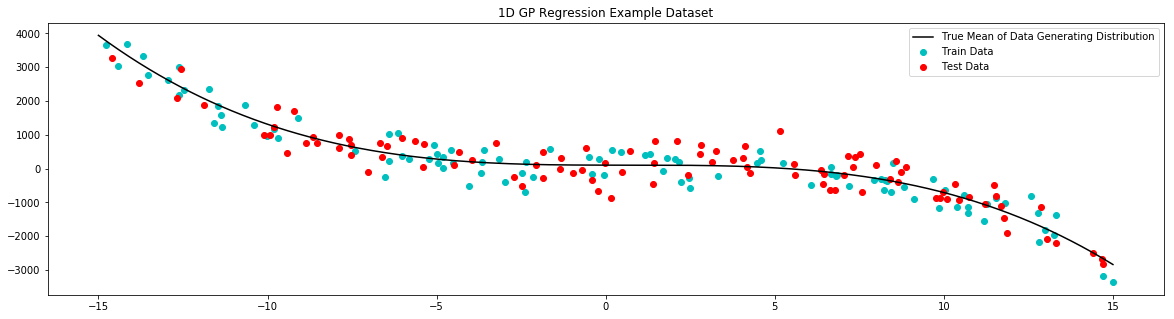

In [3]:
# plot example dataset
plt.figure(figsize=(20,5))
plt.title('1D GP Regression Example Dataset')
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.plot(x_true,y_true,label='True Mean of Data Generating Distribution', c='k')
plt.legend()
plt.show()

In [4]:
# define the distance function used by the kernel
# for this example we use the radial basis function
# you can use one of the default distance functions 
# supported by squidward (like RBF) or supply your own 
# distance function (as long as it results in a positive
# semi-definite kernel)

d = Distance.RBF(5.0,10000.0**2)

In [5]:
# the kernel base class takes the distance measure of choice
# as well as the method for evaluating the kernel (the default
# is k1 which is analogous to the scipy.distance.cdit fuction v1.2.0)
kernel = KernelBase.Kernel(d, 'k1')

In [6]:
# the model is instantiated with the kernel
# object as well as a likelihood variance (equivalent
# of a white noise kernel to model data noise)
# there is also a variety of choices for matrix
# inversion methods that trade of numeric stability and speed
model = GPR.GaussianProcess(kernel=kernel, var_l=1050**2, inv_method='solve')

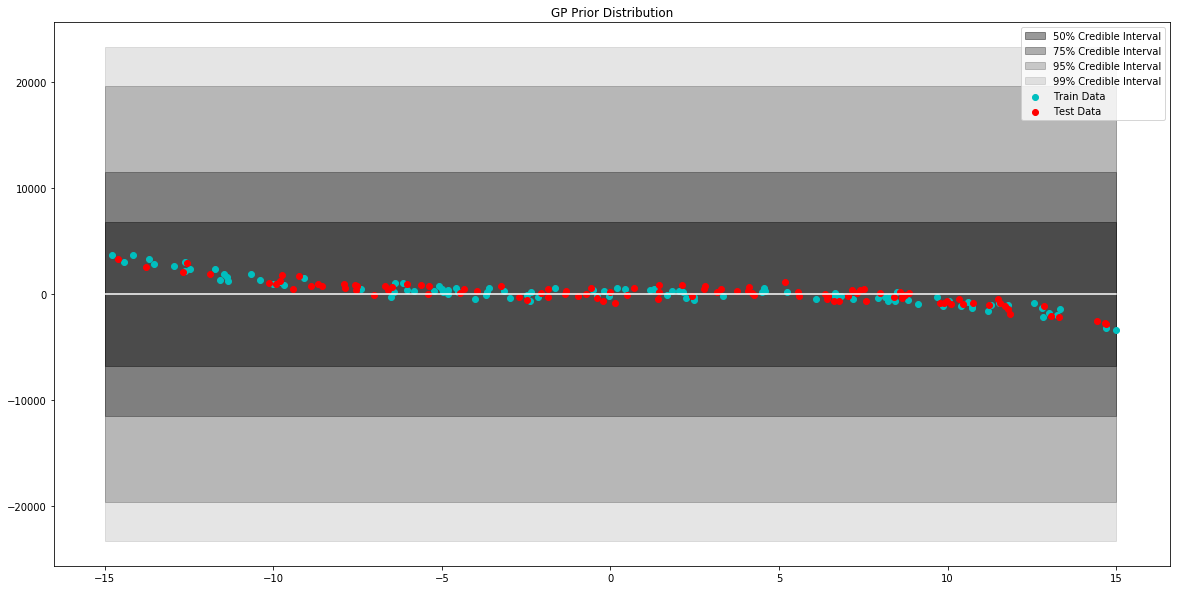

In [7]:
# generate data to plot prior of GP
x = np.linspace(-15,15,100)

# pull the parameters of the posterior
mean, var = model.prior_predict(x)

# Plot Posterior of GP
plt.figure(figsize=(20,10))
plt.title("GP Prior Distribution")
GPViz.Regression.plot_1d(x,mean,var[:,0])
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()
plt.show()

/anaconda3/envs/squidward_env/lib/python3.6/site-packages/squidward/GPR.py:198: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return np.random.multivariate_normal(mean[:,0], cov, 1).T[:, 0]


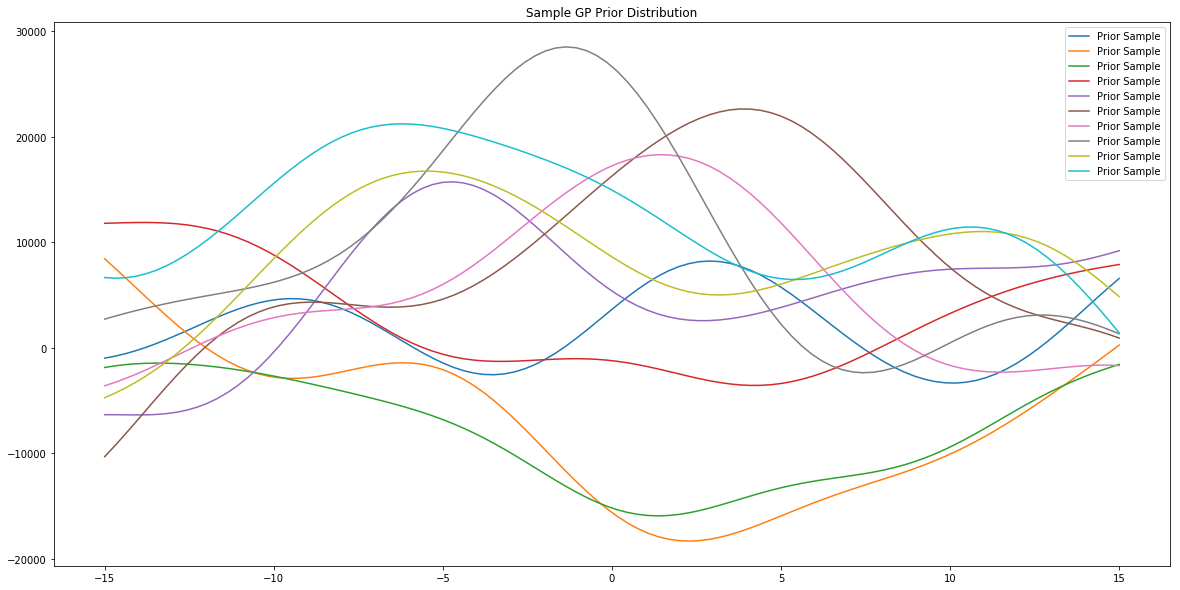

In [8]:
x = np.linspace(-15,15,100)

# Plot Posterior of GP
plt.figure(figsize=(20,10))
plt.title("Sample GP Prior Distribution")
for i in range(10):
    sample = model.prior_sample(x)
    plt.plot(x, sample, label='Prior Sample')
plt.legend()
plt.show()

In [9]:
# the model object is largely inspired by the
# scikitlearn interface
# simply call fit to "train" the model
model.fit(x_train,y_train)

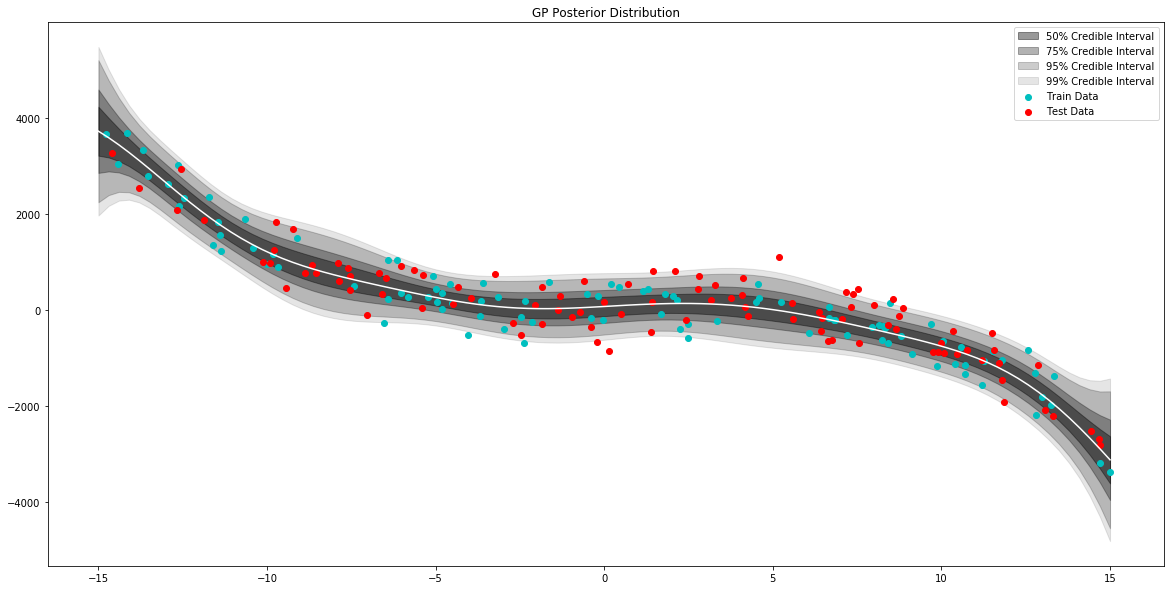

In [10]:
# generate data to plot posterior of GP
x = np.linspace(-15,15,100)

# pull the parameters of the posterior
mean, var = model.posterior_predict(x)

# Plot Posterior of GP
plt.figure(figsize=(20,10))
plt.title("GP Posterior Distribution")
GPViz.Regression.plot_1d(x,mean,var[:,0])
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()
plt.show()

In [11]:
# do basic regression validation

mean, var = model.posterior_predict(x_train)
train_acc = Validation.rmse(mean,y_train)

mean, var = model.posterior_predict(x_test)
test_acc = Validation.rmse(mean,y_test)

print("Train RMSE: {}\nTest RMSE: {}".format(train_acc,test_acc))

Train RMSE: 339.5035708617552
Test RMSE: 403.7338877808576


/anaconda3/envs/squidward_env/lib/python3.6/site-packages/squidward/GPR.py:179: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return np.random.multivariate_normal(mean[:,0], cov, 1).T[:, 0]


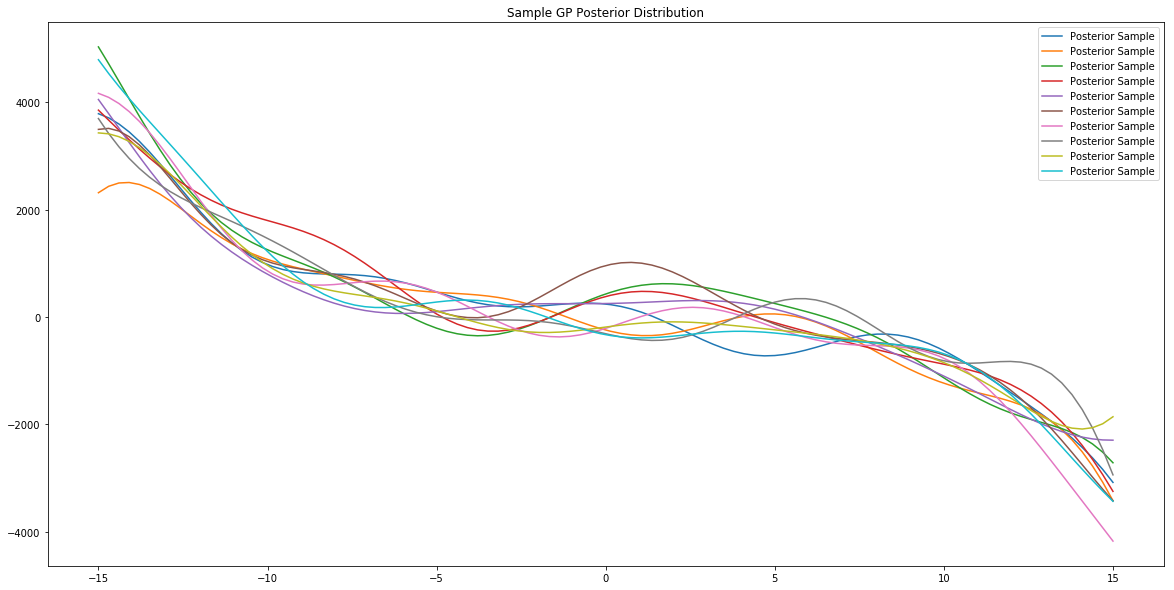

In [12]:
x = np.linspace(-15,15,100)

# Plot Posterior of GP
plt.figure(figsize=(20,10))
plt.title("Sample GP Posterior Distribution")
for i in range(10):
    sample = model.posterior_sample(x)
    plt.plot(x, sample, label='Posterior Sample')
plt.legend()
plt.show()